In [4]:
import kgen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymyami

In [5]:
# https://doi.org/10.1016/j.gca.2019.02.041
param_df = pd.read_csv('pymyami/parameters/Zeebe2019.csv', index_col=0, comment='#')
params = {k: param_df[k].values.reshape(-1,1) for k in param_df.columns}
modern = np.array([0.0102821, 0.0528171, 0.0282352]).reshape(-1,1)  # Ca, Mg, SO4

In [6]:
from pymyami.helpers import shape_matcher

In [7]:
def zeebe_tyrrell(Ca, Mg, SO4):
    Ca, Mg, SO4 = shape_matcher(Ca, Mg, SO4)
    target = np.vstack([Ca, Mg, SO4])
    
    RC = target / modern - 1
    
    return {k: 1 + (params[k] * RC).sum(0) for k in params}

Text(0.5, 0, 'SO4')

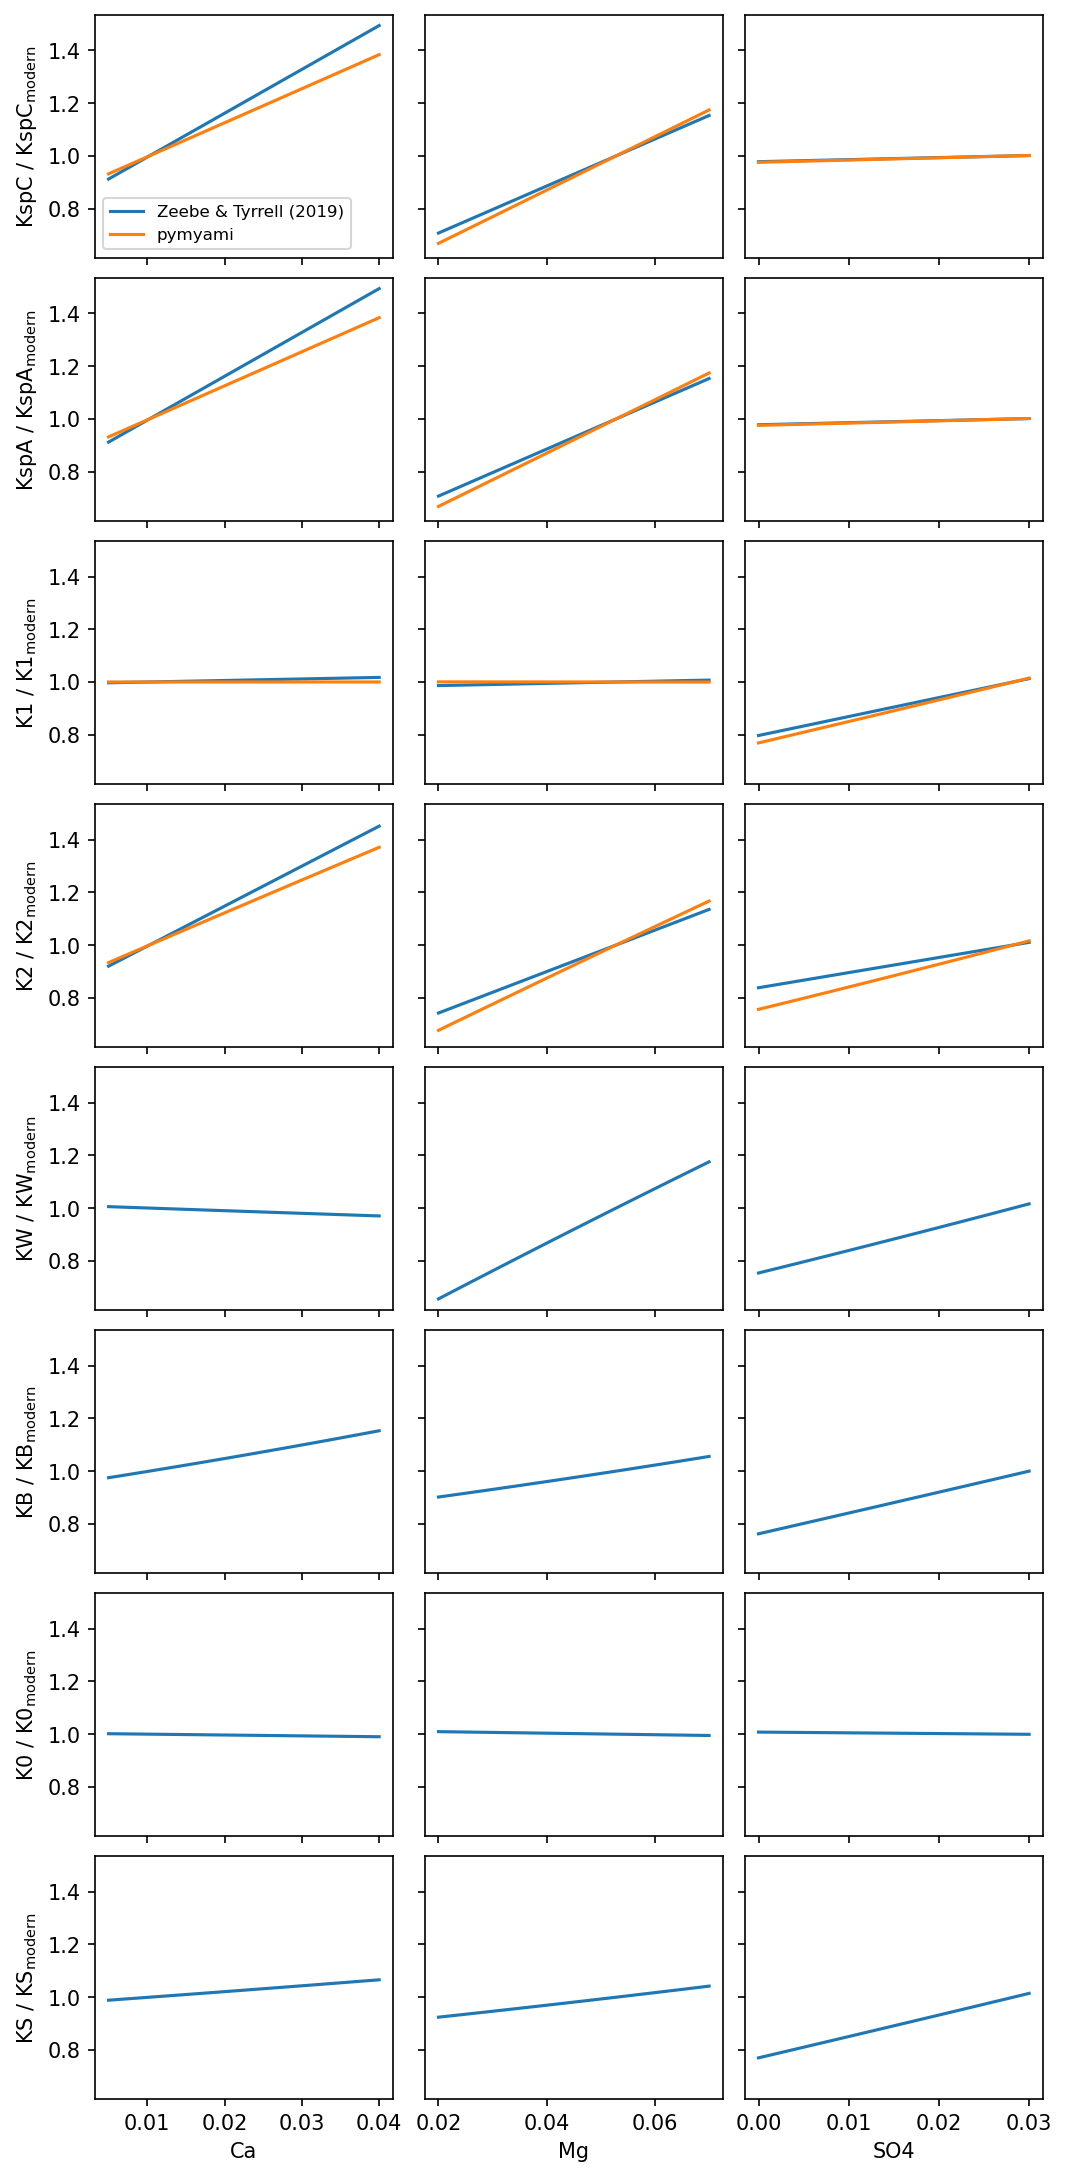

In [8]:
ca = np.linspace(5, 40) * 1e-3
vca = zeebe_tyrrell(Ca=ca, Mg=0.0528171, SO4=0.0282352)
pmca = pymyami.calculate.calc_Fcorr(Ca=ca)

mg = np.linspace(20, 70) * 1e-3
vmg = zeebe_tyrrell(Ca=0.0102821, Mg=mg, SO4=0.0282352)
pmmg = pymyami.calculate.calc_Fcorr(Mg=mg)

so4 = np.linspace(0, 30) * 1e-3
vso4 = zeebe_tyrrell(Ca=0.0102821, Mg=0.0528171, SO4=so4)
pmso4 = pymyami.calculate.calc_Fcorr(SO4=so4)

fig, axs = plt.subplots(len(pmca), 3, figsize=[7, 1.8 * len(pmca)], sharey=True, sharex='col', constrained_layout=True)

for kplot, row in zip(pmca, axs):

    ax0, ax1, ax2 = row

    # Variable Ca
    if kplot in vca:
        ax0.plot(ca, vca[kplot], label='Zeebe & Tyrrell (2019)')
    ax0.plot(ca, pmca[kplot], label = 'pymyami')

    # Variable Mg
    if kplot in vmg:
        ax1.plot(mg, vmg[kplot], label='Zeebe & Tyrrell')
    ax1.plot(mg, pmmg[kplot], label = 'pymyami')

    # Variable SO4
    if kplot in vso4:
        ax2.plot(so4, vso4[kplot], label='Zeebe & Tyrrell')
    ax2.plot(so4, pmso4[kplot], label = 'pymyami')

    ax0.set_ylabel(f'{kplot} / {kplot}' + '$_{modern}$')

axs[0,0].legend(fontsize=8)

axs[-1,0].set_xlabel('Ca')
axs[-1,1].set_xlabel('Mg')
axs[-1,2].set_xlabel('SO4')
